In [1]:
# Install necessary libraries
!pip install torch torchvision torchaudio
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repository
%cd yolov5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 27.3 MB/s eta 0:00:00


In [3]:
import yaml

# Define file path
yaml_file = "/content/drive/MyDrive/data/data.yaml"

# Load the YAML file
with open(yaml_file, "r") as f:
    data = yaml.safe_load(f)

# Modify contents (Example: Change number of classes)
data["nc"] = 6  # Change to desired number of classes
data["train"] = "/content/drive/MyDrive/dataset/train/images"  # Update train path if needed
data["val"] = "/content/drive/MyDrive/dataset/val/images"   # Update validation path

# Save changes
with open(yaml_file, "w") as f:
    yaml.dump(data, f, default_flow_style=False)

print("data.yaml updated successfully!")


data.yaml updated successfully!


In [4]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/data/data.yaml --weights yolov5s.pt --cache


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-02-14 19:35:05.528369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739561705.786471    4483 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739561705.854576    4483 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [5]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/drive/MyDrive/data/data.yaml --img 640

val: data=/content/drive/MyDrive/data/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/dataset/val/labels.cache... 156 images, 0 backgrounds, 0 corrupt: 100% 156/156 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:03<00:00,  1.25it/s]
                   all        156        181      0.979      0.975      0.992       0.75
                broken        156         29      0.975          1      0.995      0.797
       

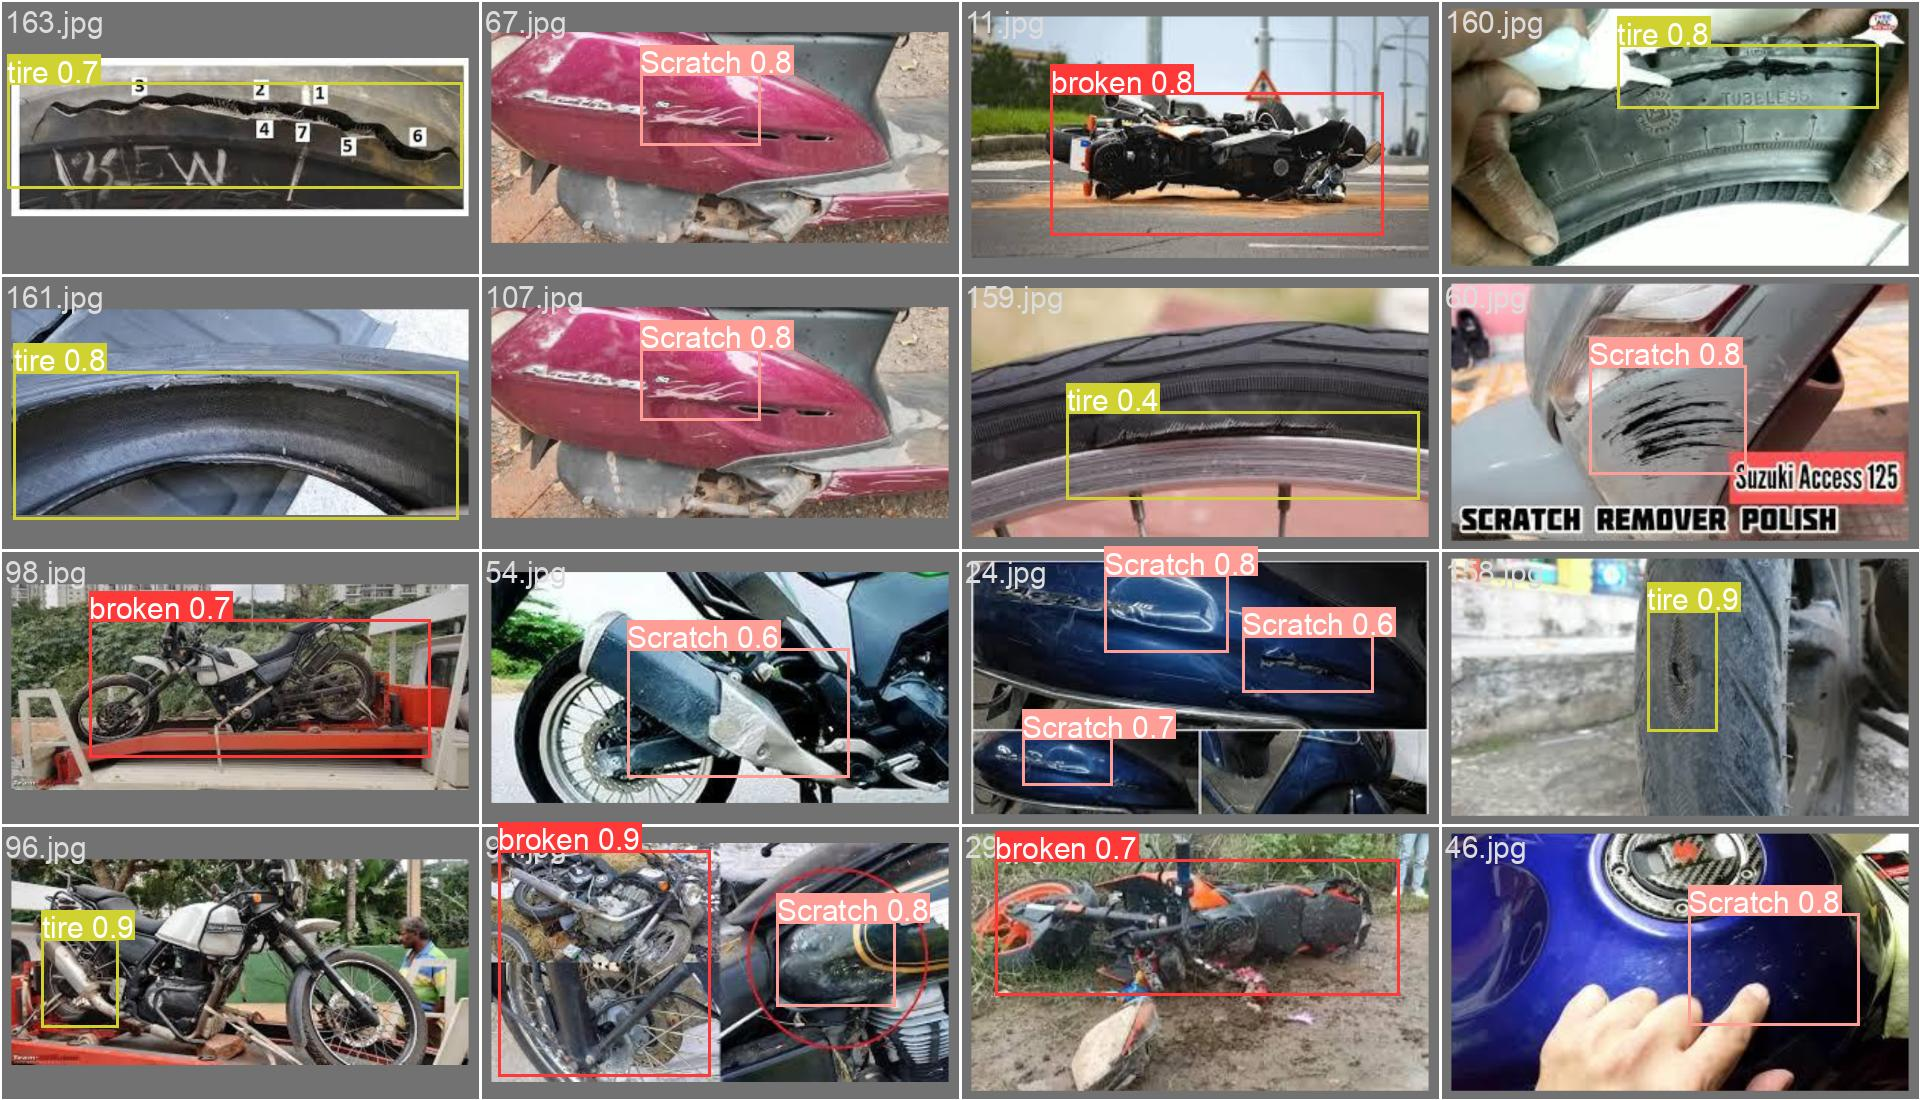

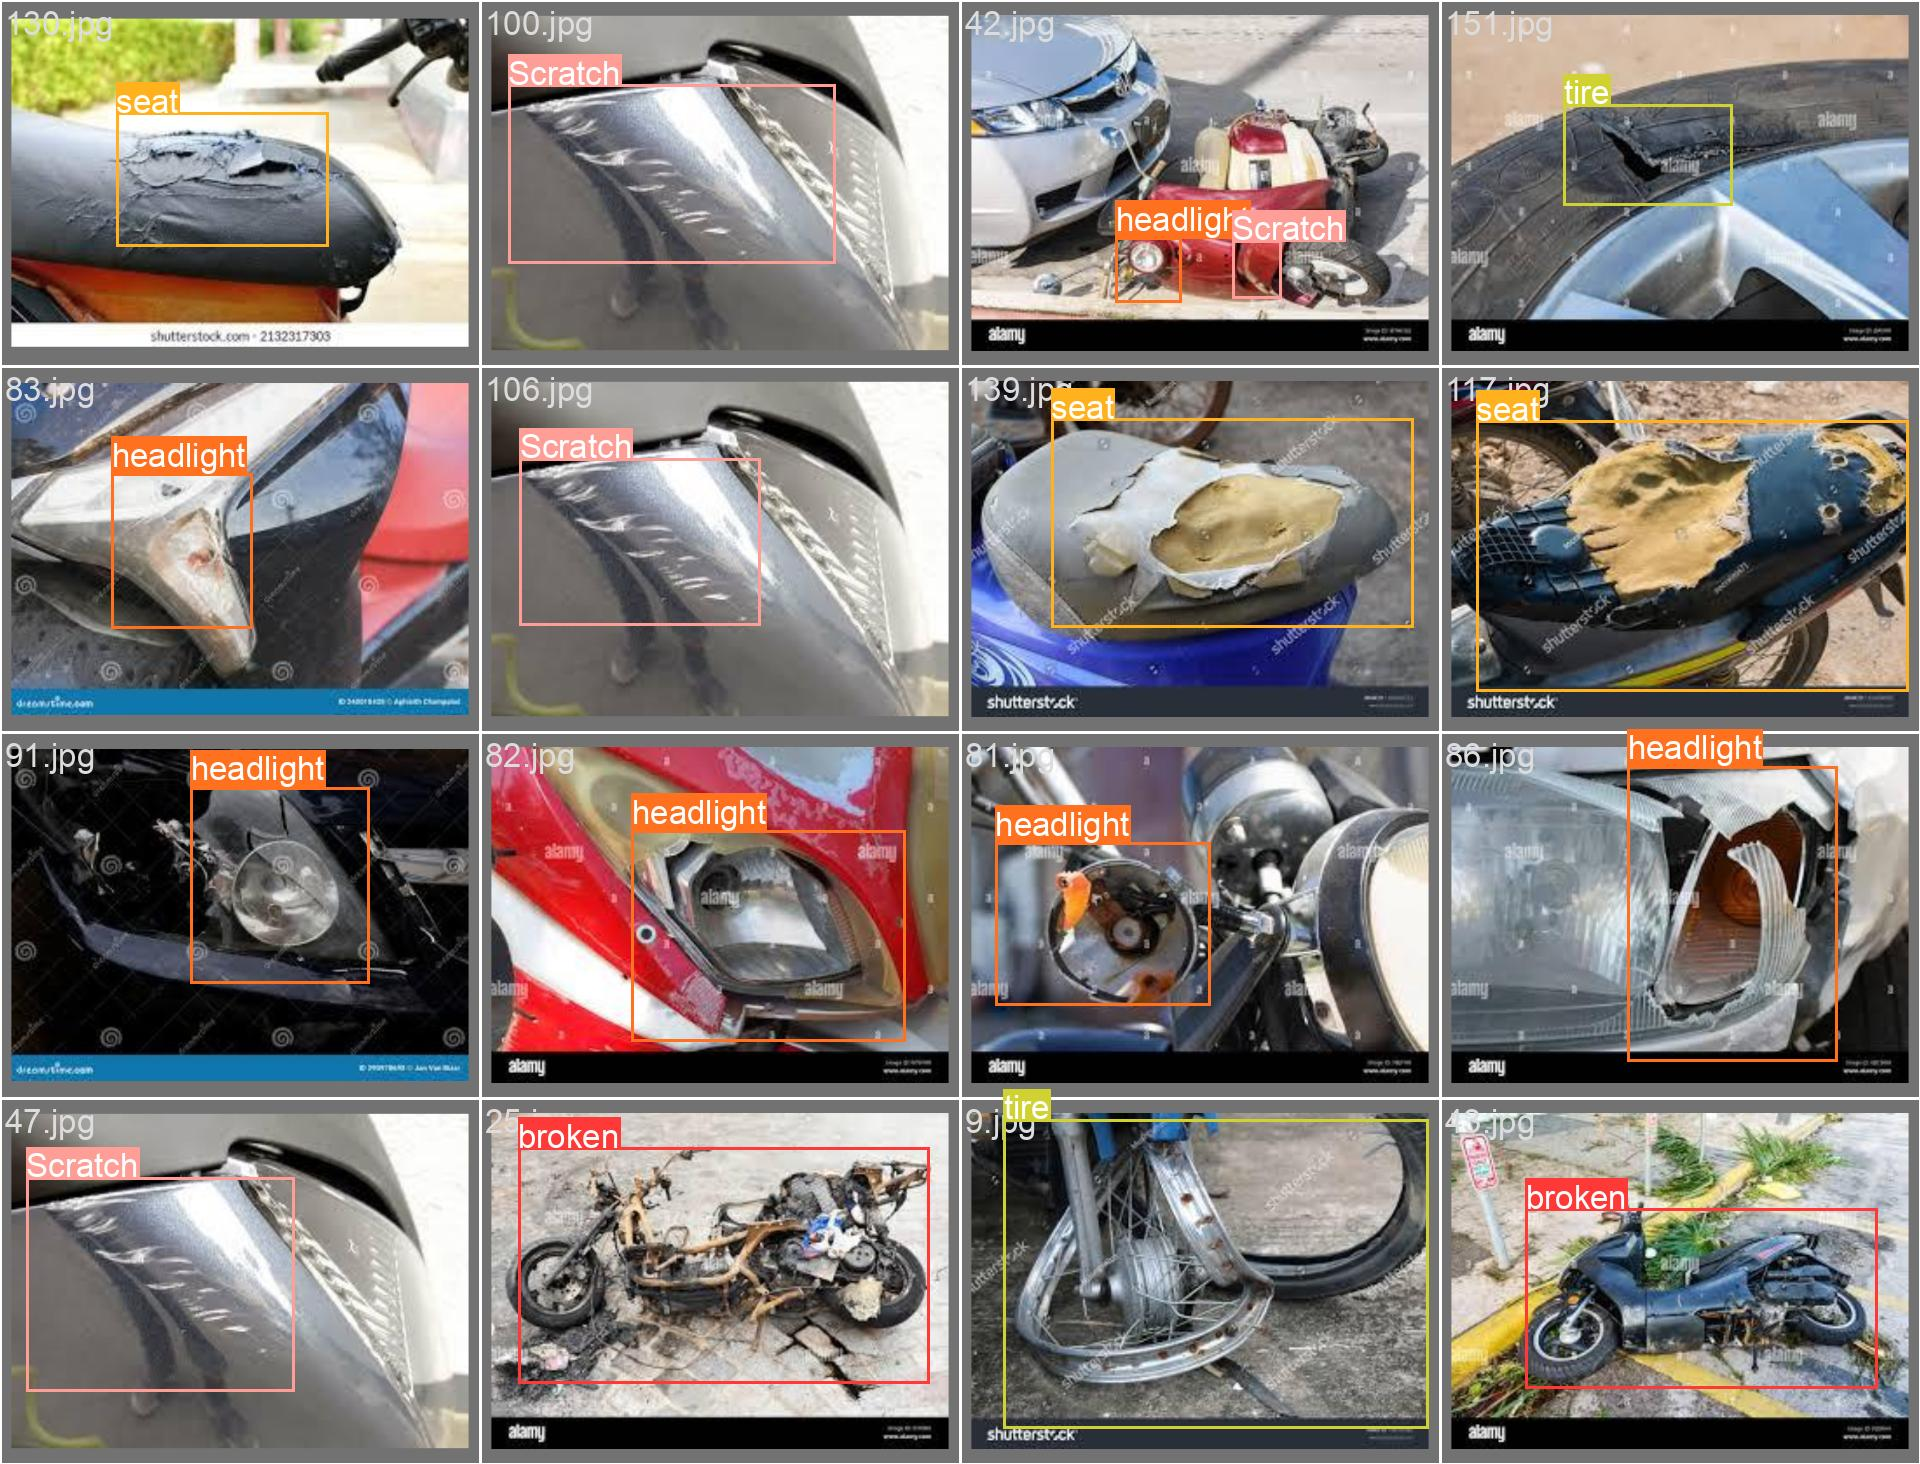

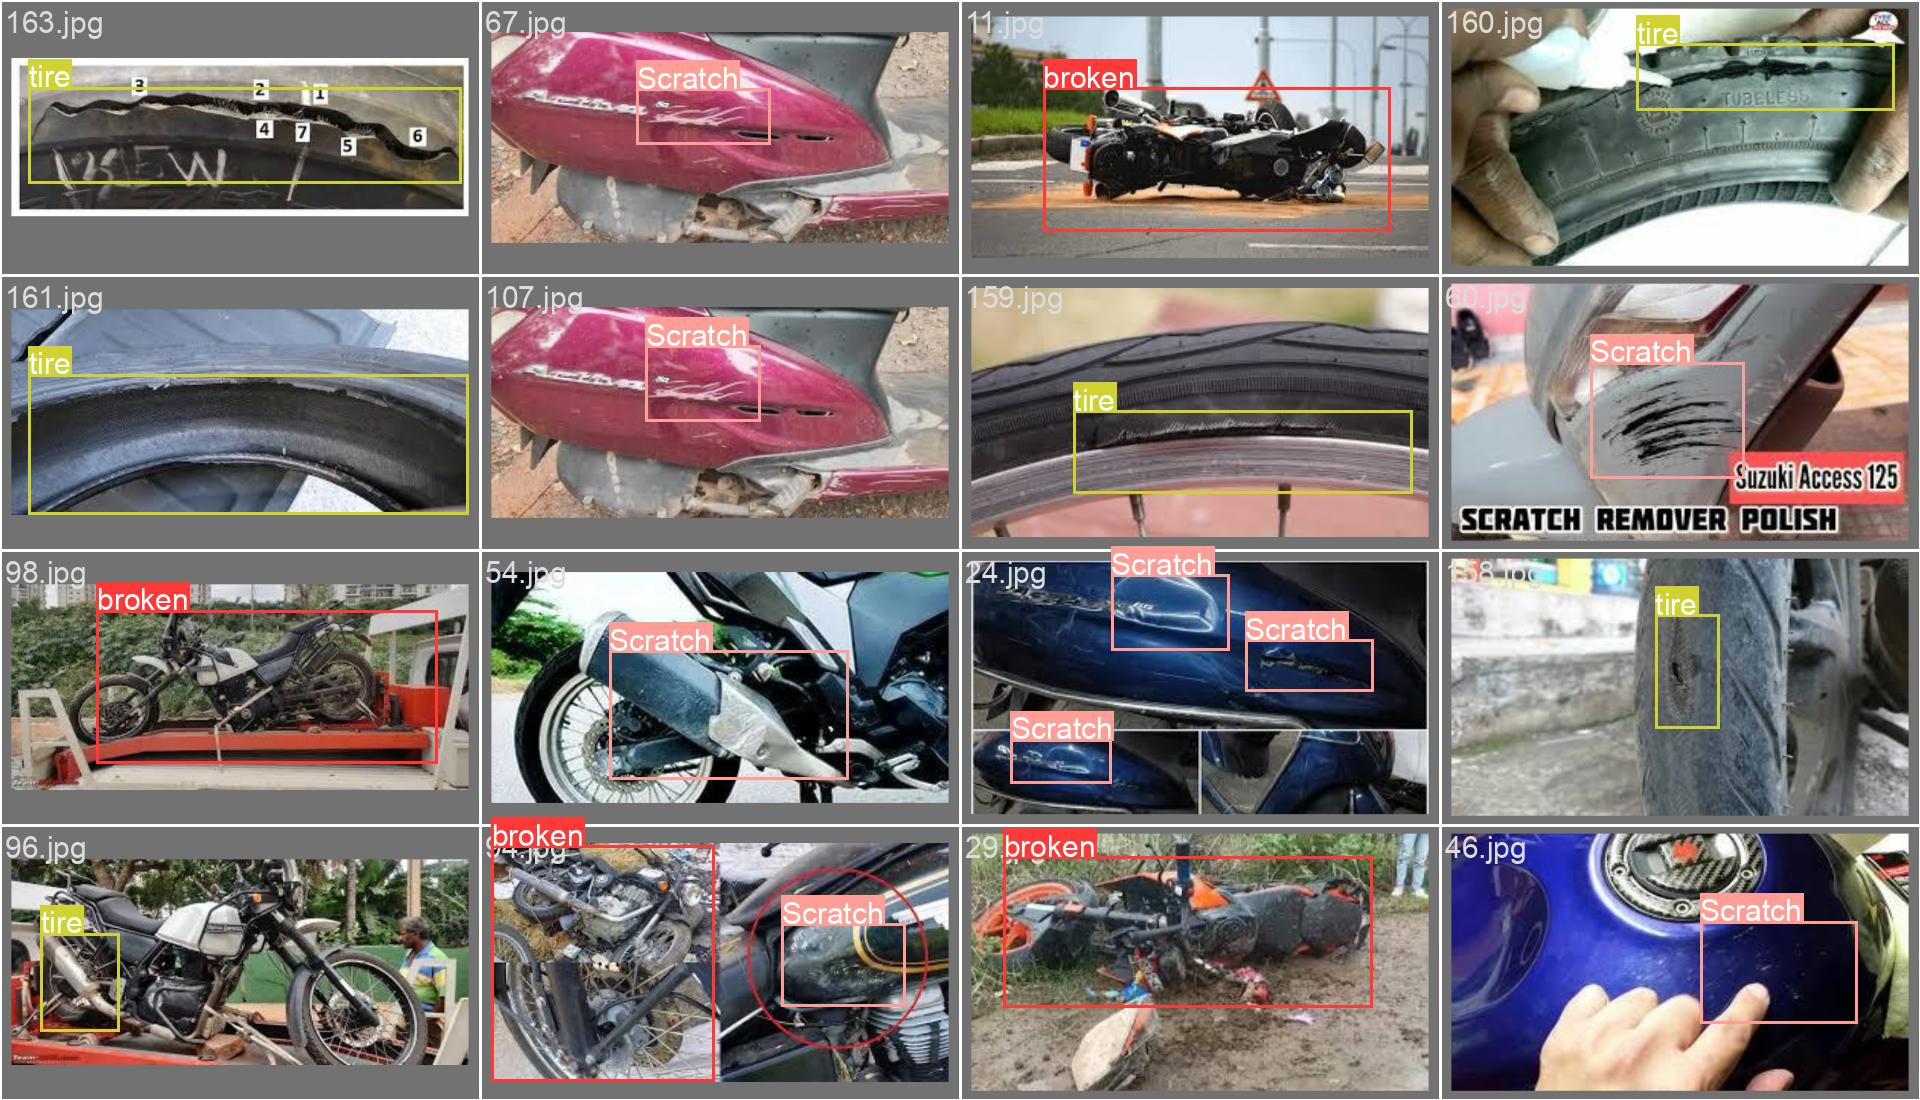

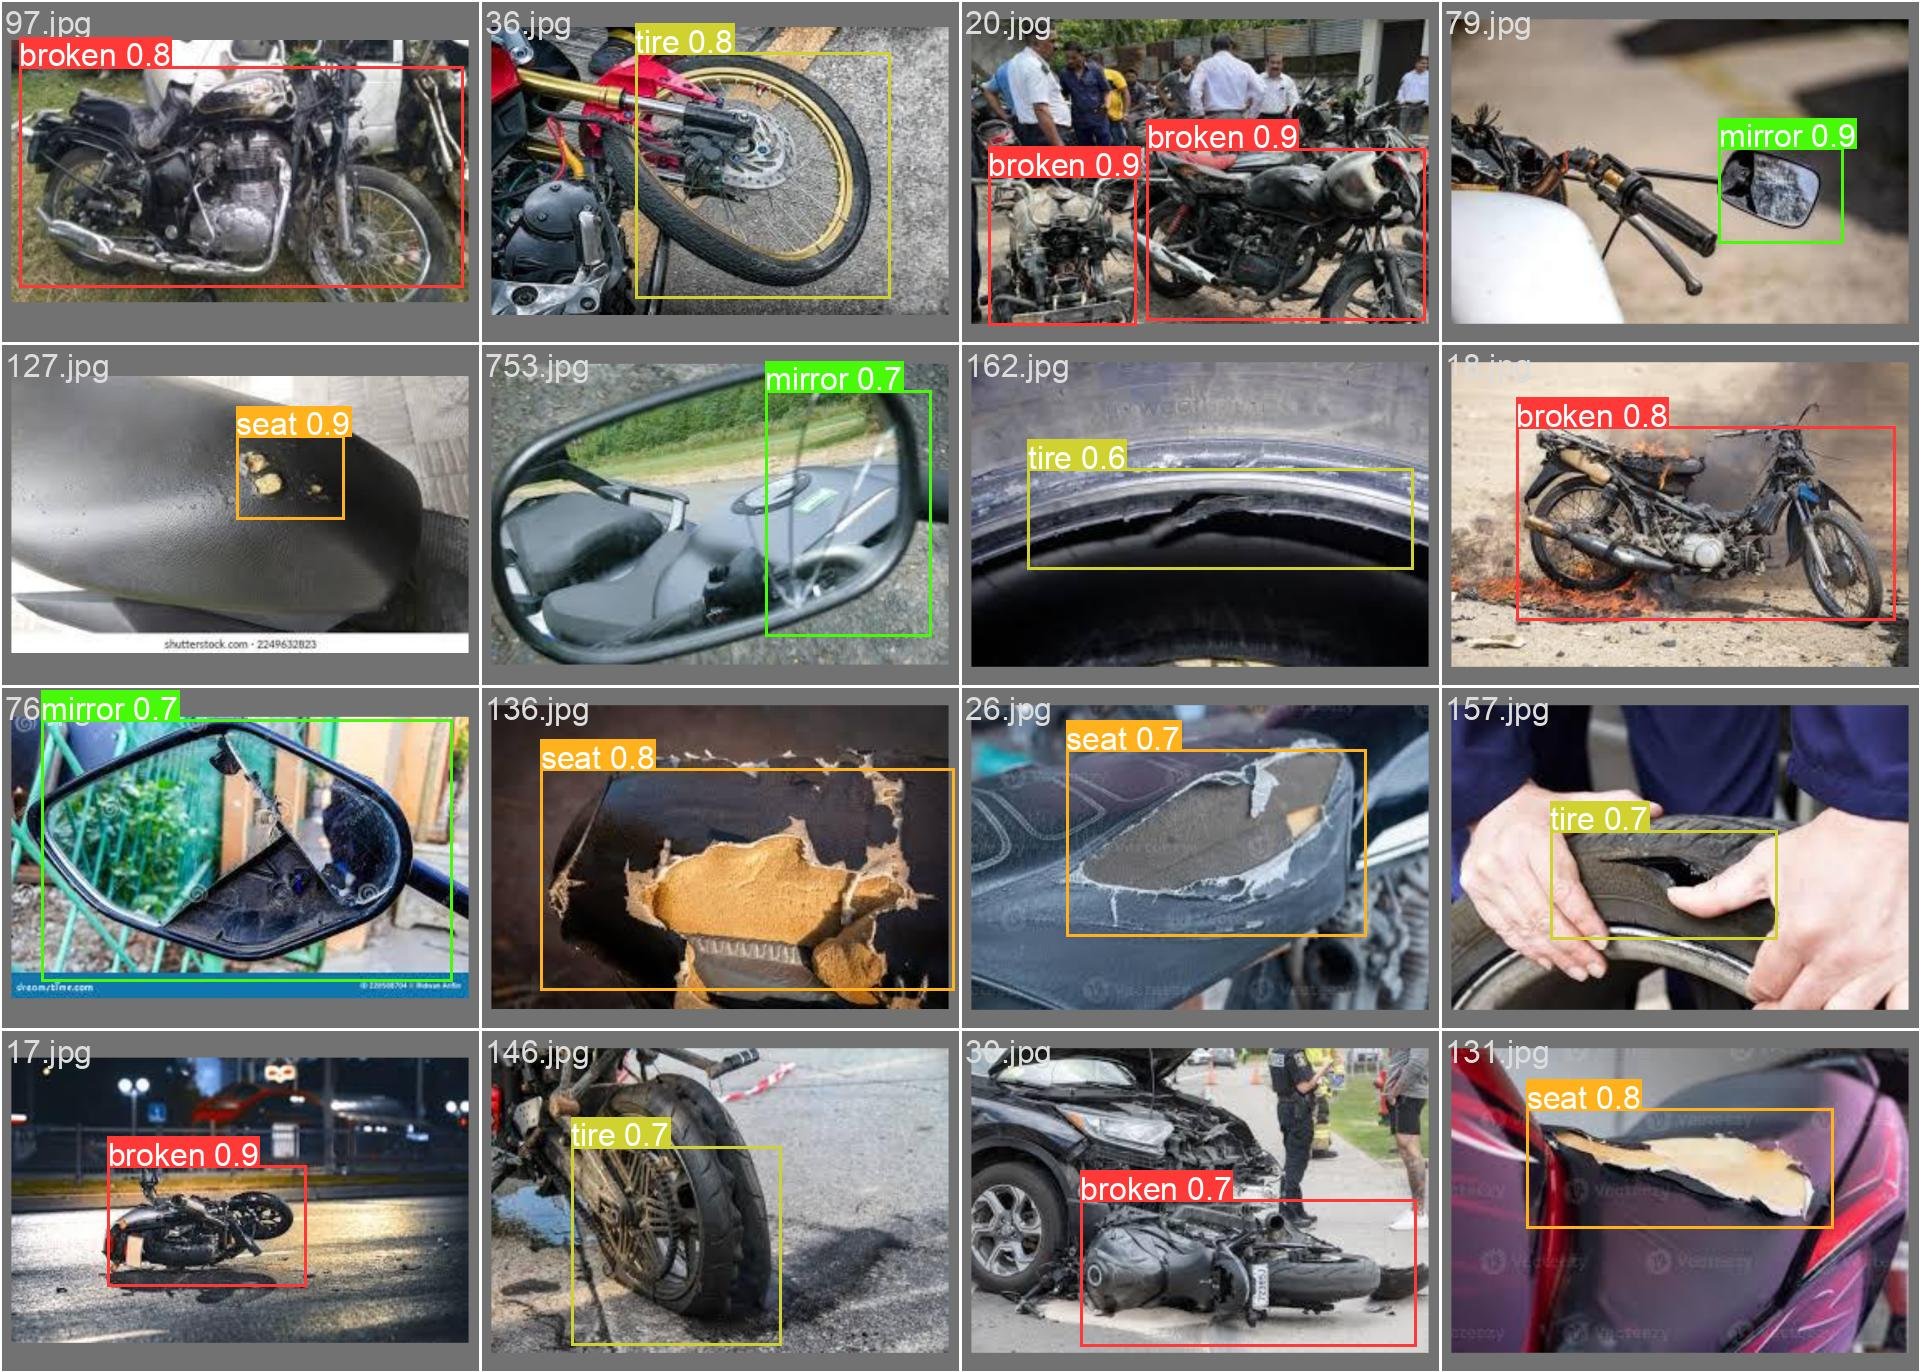

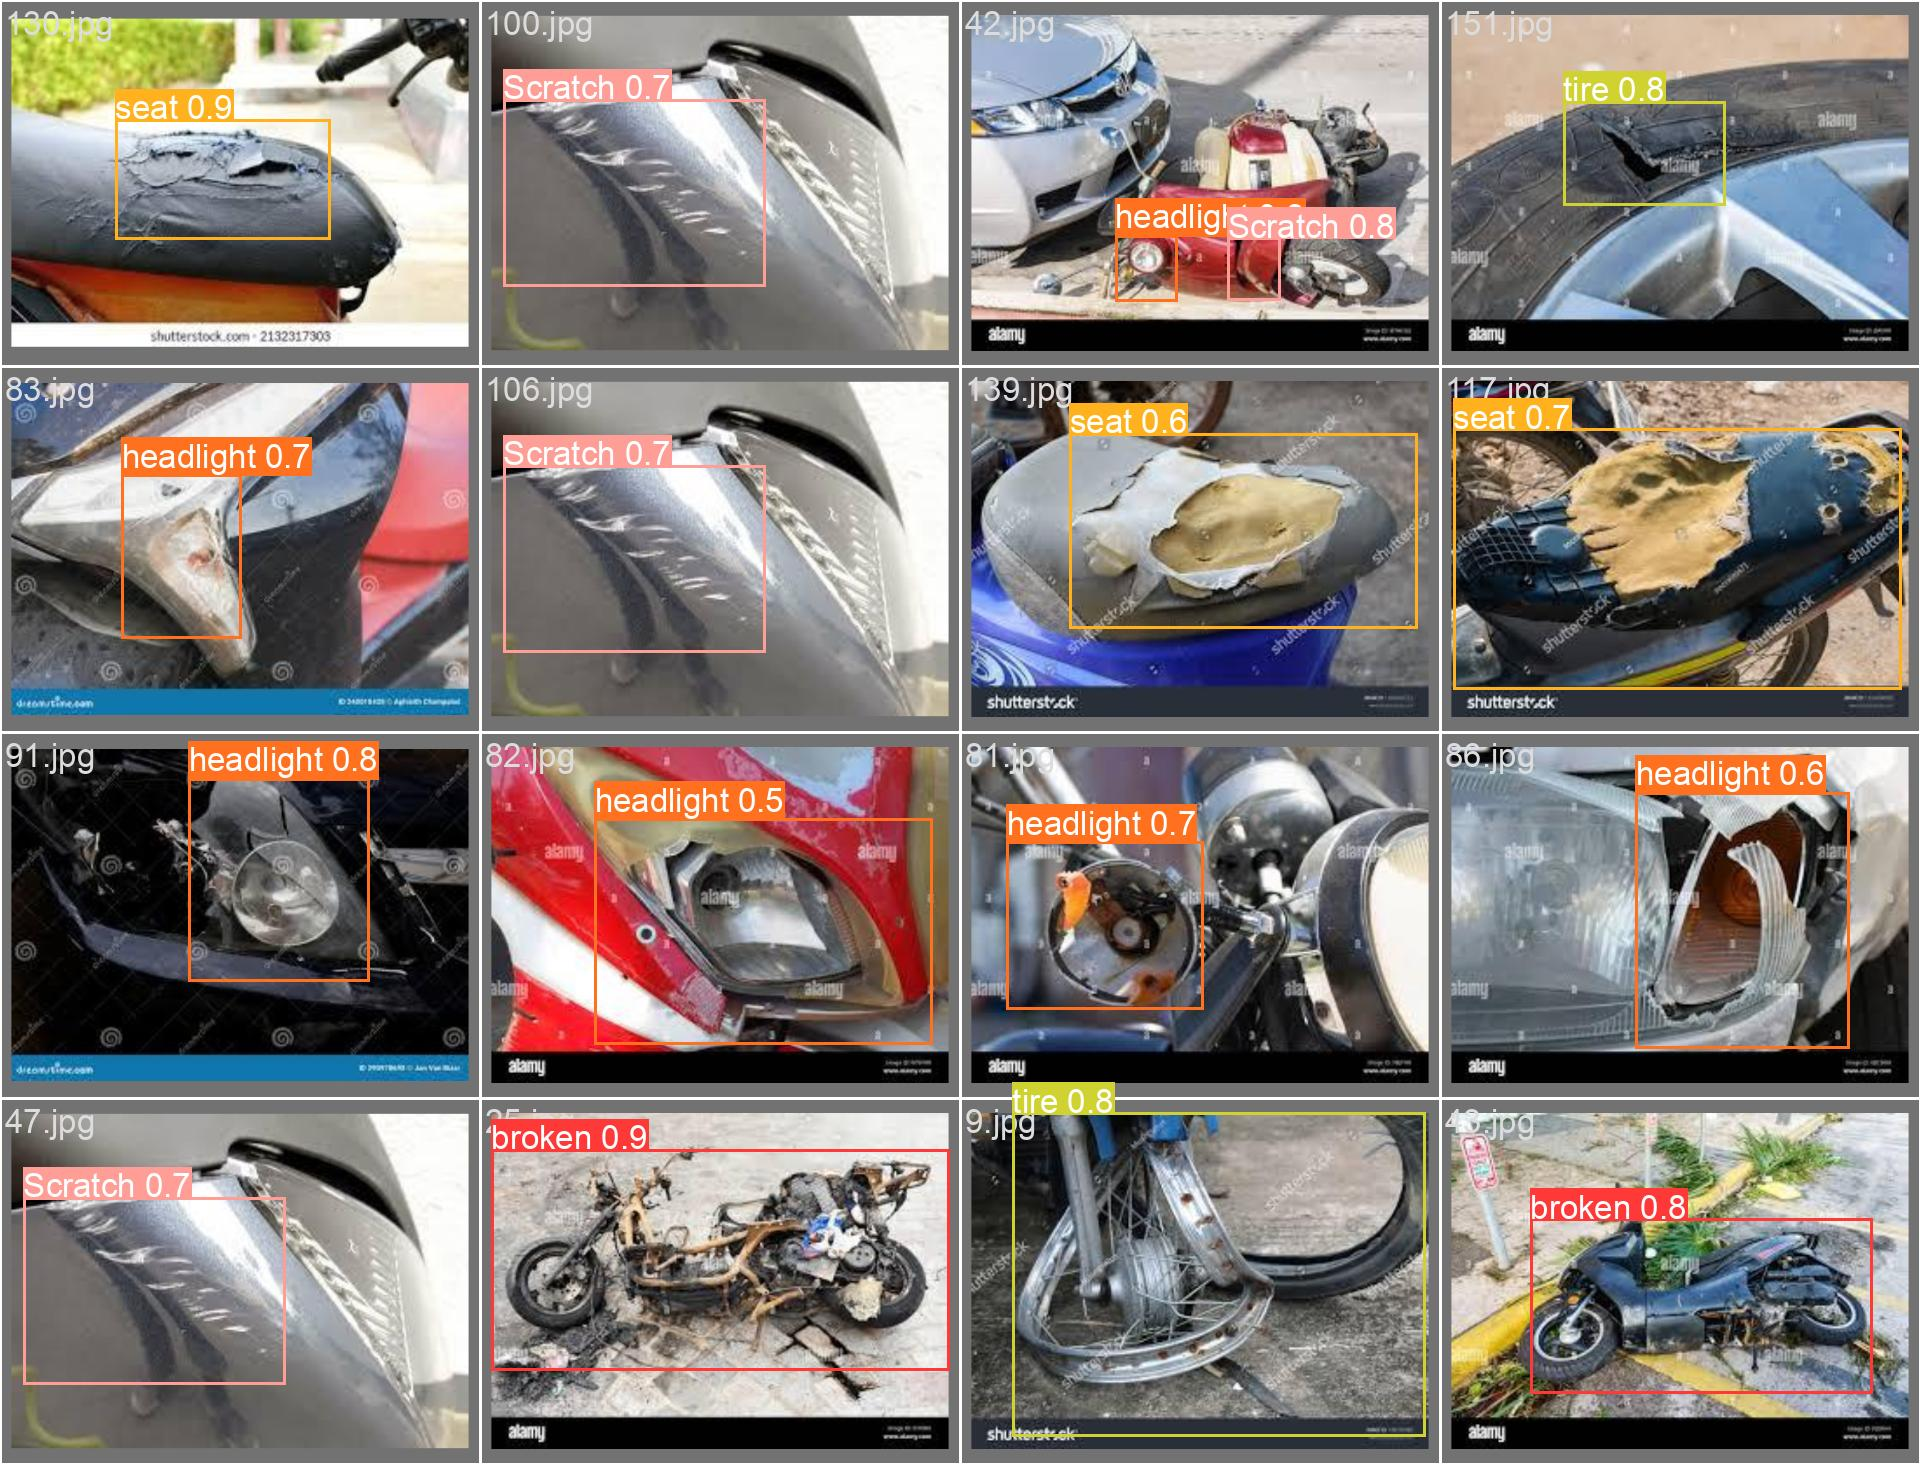

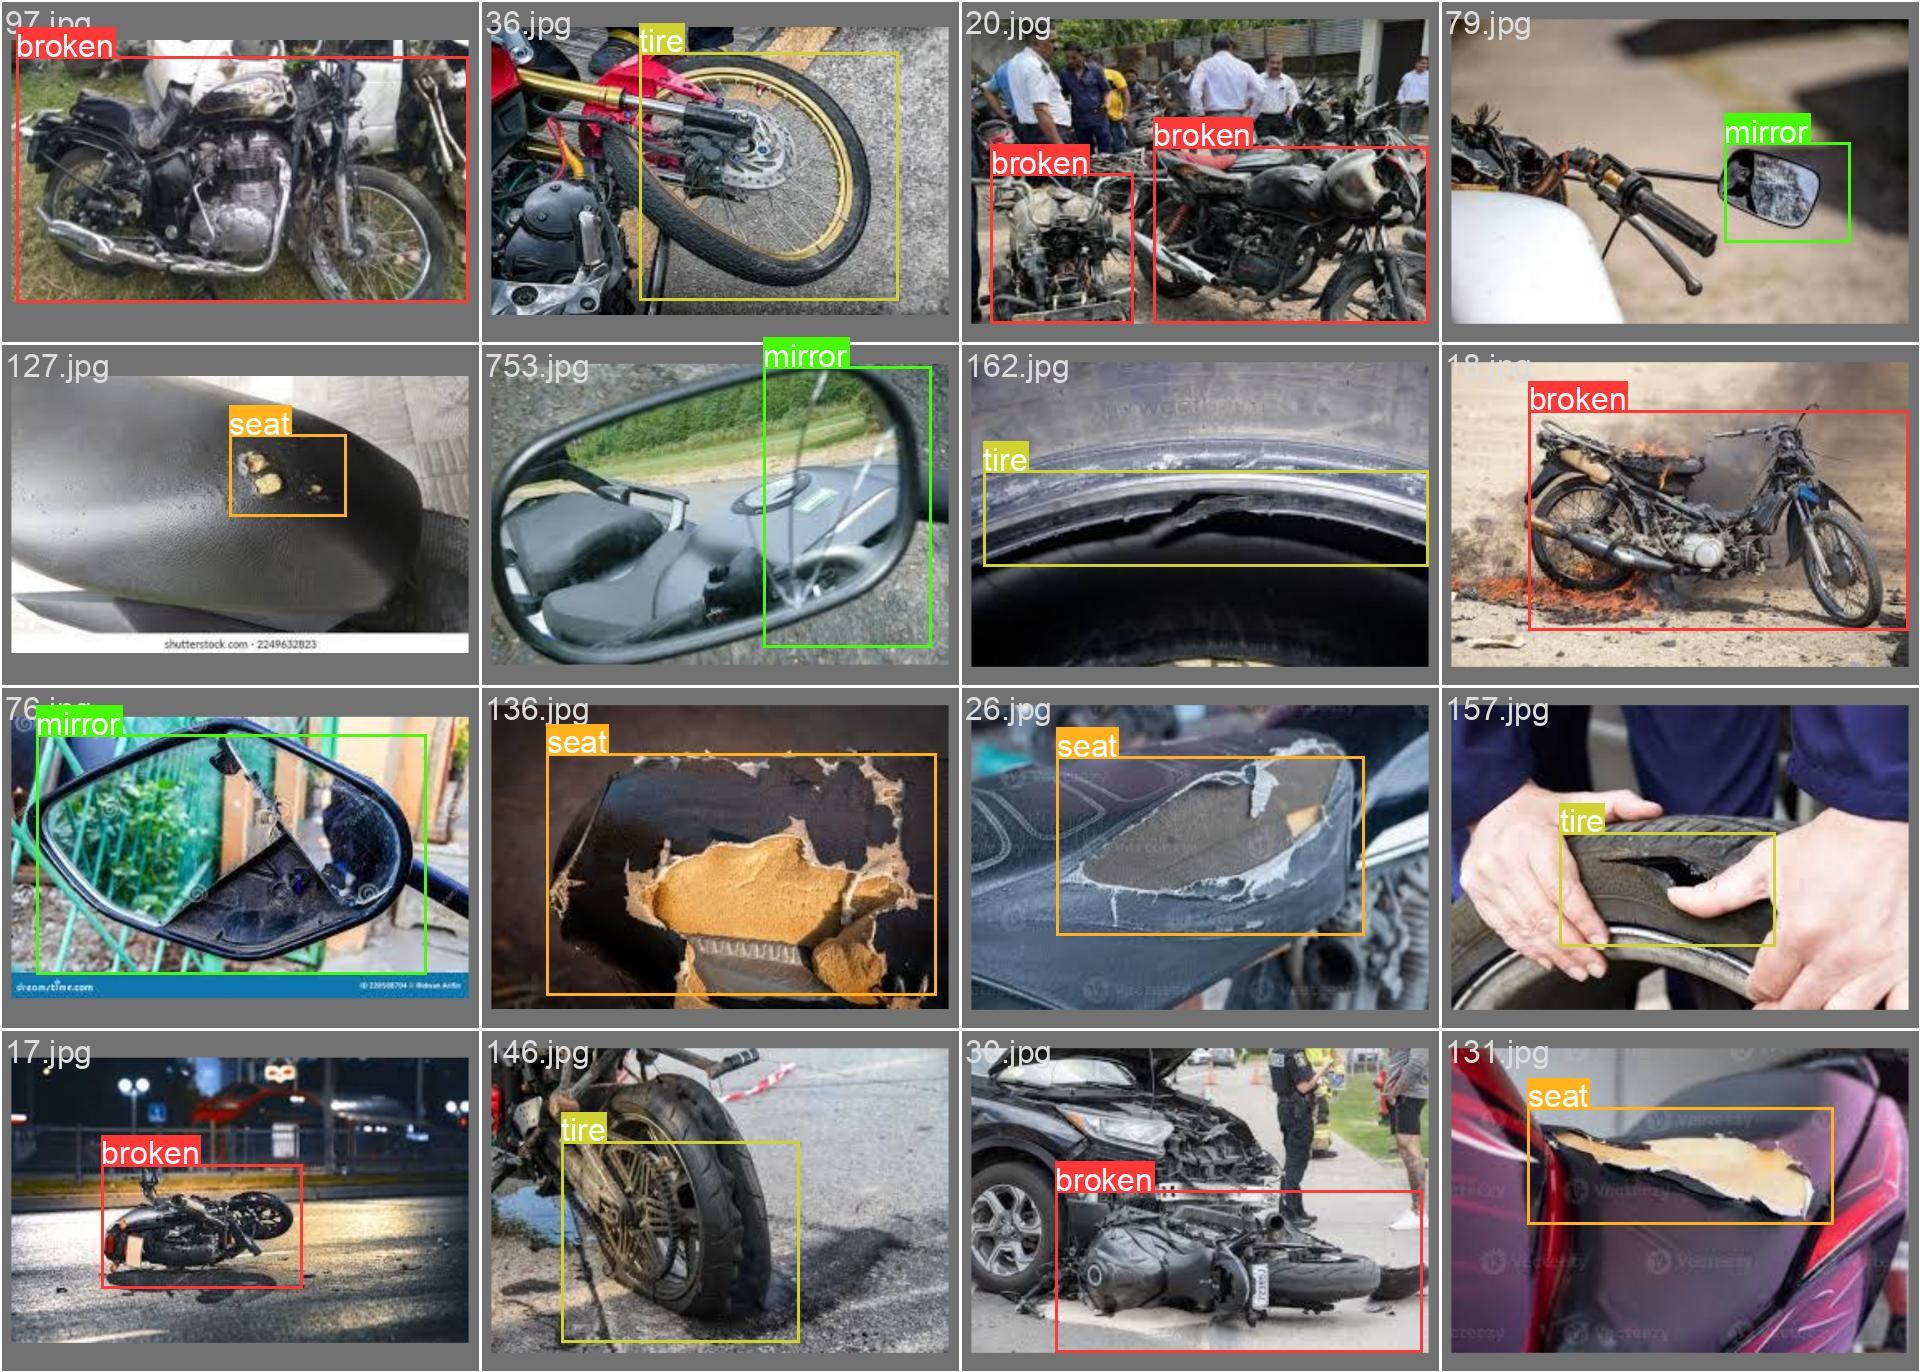

In [6]:
import glob
from IPython.display import Image, display

result_images = glob.glob('runs/val/exp/*.jpg')

for image in result_images:
    display(Image(filename=image))